## 대한민국 출생아수 데이터 (통계청 제공)분석 ##
----------------------

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./population_kosis.csv",encoding="cp949")
df = df.drop(index=0)
# pd.options.display.max_columns = 793  #출력칼럼수 조절하는 옵션
df.head(2)

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2021.09.2,2021.10,2021.10.1,2021.10.2,2021.11,2021.11.1,2021.11.2,2021.12,2021.12.1,2021.12.2
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10743,20749,10598,10151,19829,10201,9628,17179,8725,8454
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1814,3533,1839,1694,3513,1818,1695,3034,1557,1477


In [3]:
df1 = df.melt(id_vars=['시군구별'],var_name="기준년월",value_name="명")
df1

,시군구별,기준년월,명
0,전국,1997.01,63268
1,서울특별시,1997.01,13205
2,부산광역시,1997.01,4201
3,대구광역시,1997.01,3345
4,인천광역시,1997.01,3646
...,...,...,...
16195,전라북도,2021.12.2,244
16196,전라남도,2021.12.2,261
16197,경상북도,2021.12.2,382
16198,경상남도,2021.12.2,478


### 성별 출생아수 분석 ###
------------------------------------

In [4]:
df1_bysex = df1.copy()
df1_bysex['연도'] = df1_bysex['기준년월'].str.split('.', expand=True)[0]
df1_bysex['월'] = df1_bysex['기준년월'].str.split('.', expand=True)[1]
df1_bysex['성별'] = df1_bysex['기준년월'].str.split('.', expand=True)[2]
df1_bysex['성별'] = df1_bysex['성별'].fillna('전체')
df1_bysex['성별'] = df1_bysex['성별'].replace("1","남자").replace("2","여자")
df1_bysex = df1_bysex.rename(columns={'기준년월':'기간','명':'출생아수'})
df1_bysex.head()

,시군구별,기간,출생아수,연도,월,성별
0,전국,1997.01,63268,1997,01,전체
1,서울특별시,1997.01,13205,1997,01,전체
2,부산광역시,1997.01,4201,1997,01,전체
3,대구광역시,1997.01,3345,1997,01,전체
4,인천광역시,1997.01,3646,1997,01,전체


In [5]:
df1_bysex['성별'].unique()

array(['전체', '남자', '여자'], dtype=object)

In [6]:
df1_bysex['성별'].value_counts()

전체    5400
남자    5400
여자    5400
Name: 성별, dtype: int64

In [7]:
df1_bysex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16200 entries, 0 to 16199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16200 non-null  object
 1   기간      16200 non-null  object
 2   출생아수    16200 non-null  object
 3   연도      16200 non-null  object
 4   월       16200 non-null  object
 5   성별      16200 non-null  object
dtypes: object(6)
memory usage: 759.5+ KB


In [8]:
df1_bysex.describe()

,시군구별,기간,출생아수,연도,월,성별
count,16200,16200,16200,16200,16200,16200
unique,18,900,4911,25,12,3
top,전국,1997.01,-,1997,01,전체
freq,900,18,540,648,1350,5400


In [9]:
import numpy as np
df1_bysex['출생아수'] = df1_bysex['출생아수'].replace('-',np.nan).astype(float) # np.nan 이 float 타입이라 float 로 전체형변환

In [10]:
df1_bysex.describe()  # 값이 비어있는곳은 nan 으로 처리해줘야 결측치 처리가 되어 평균값같은것이 외곡되지 않는다.

,출생아수
count,15660.000000
mean,2954.615581
std,6495.725504
min,30.000000
25%,604.000000
50%,1002.000000
75%,1875.250000
max,63268.000000


In [15]:
df1_bysex_all = df1_bysex[(df1_bysex['시군구별']=='전국') & (df1_bysex['성별']== '전체')]
df1_bysex_all = df1_bysex_all[['연도','월','출생아수']]
df1_bysex_all.head()

,연도,월,출생아수
0,1997,01,63268.0
54,1997,02,58144.0
108,1997,03,62160.0
162,1997,04,56949.0
216,1997,05,55270.0


* **pandas 를 이용한 시각화**

In [12]:
!pip install -U matplotlib

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot: xlabel='연도,월'>

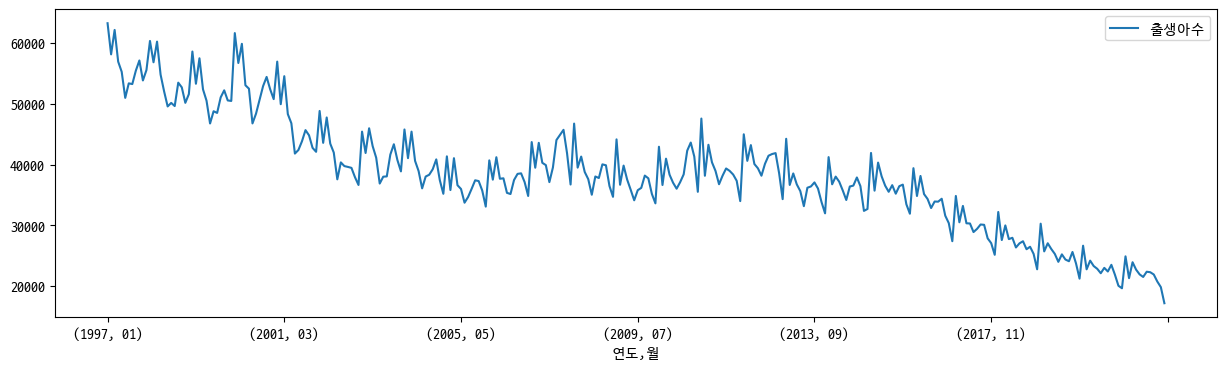

In [17]:
import matplotlib.pyplot  as plt
plt.rc('font', family='D2Coding')
df1_bysex_all.set_index(['연도','월']).plot(figsize=(15,4))  # 인덱스가 X 축으로 나온다.

<AxesSubplot: xlabel='연도,월'>

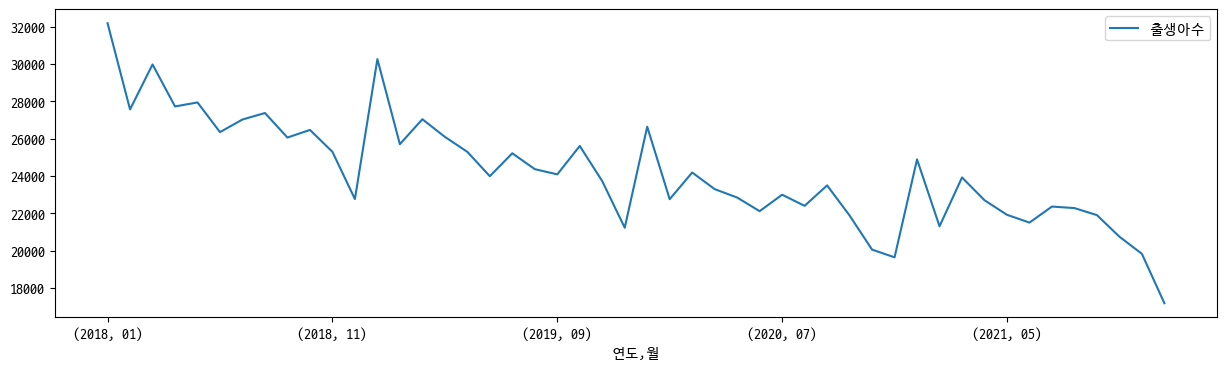

In [27]:
plt.rc('font', family='D2Coding')
df1_bysex_all.set_index(['연도','월'])[-48:].plot(figsize=(15,4))  # 48개월치만 보기

In [19]:
import seaborn as sns

<AxesSubplot: xlabel='연도', ylabel='출생아수'>

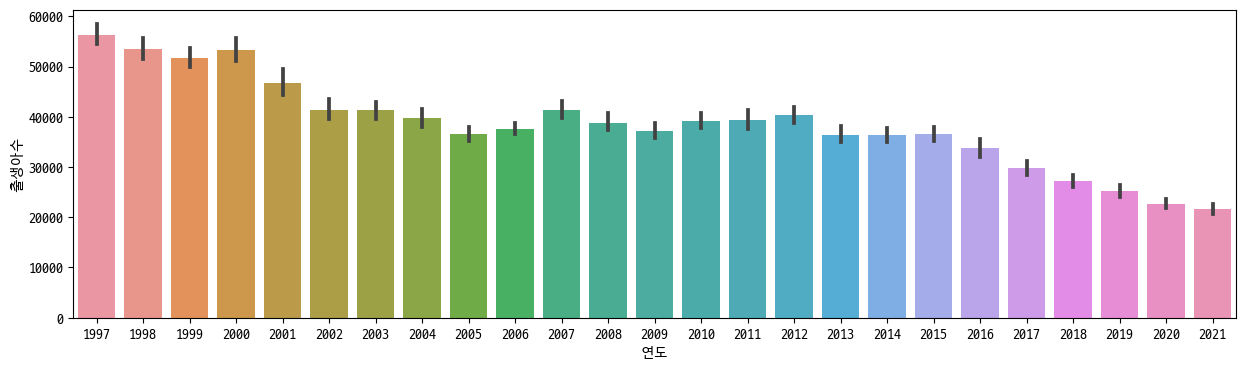

In [21]:
plt.figure(figsize=(15,4))
sns.barplot(data=df1_bysex_all , x="연도",y="출생아수")

<AxesSubplot: xlabel='연도', ylabel='출생아수'>

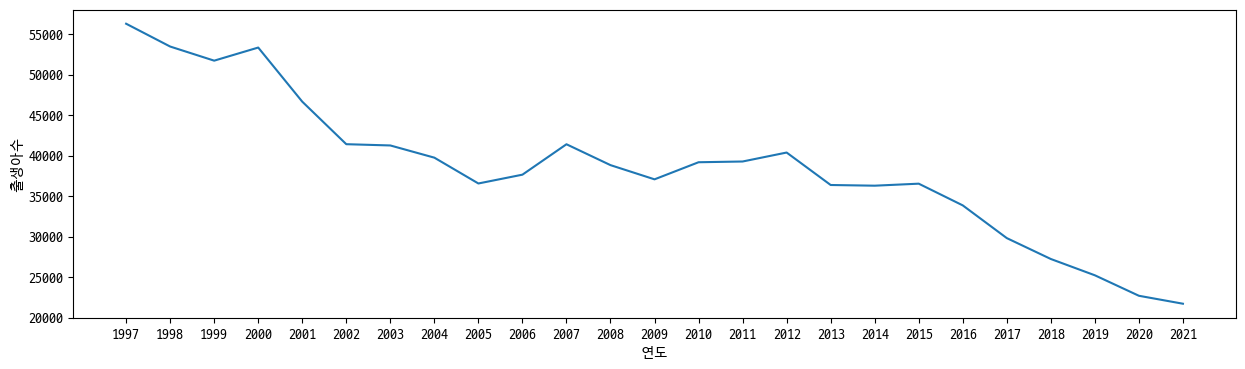

In [32]:
plt.figure(figsize=(15,4))
# sns.lineplot(data=df1_bysex_all , x="연도",y="출생아수")
sns.lineplot(data=df1_bysex_all , x="연도",y="출생아수", errorbar=None)  # errorbar:신뢰구간표시없음 ,(구옵션 ci=None) 과 동일한 옵션

### 지역별 출생아수 분석 ###
------------------------------------

In [28]:
import numpy as np
df1_local = df1.copy()
df1_local['연도'] = df1_local['기준년월'].str.split('.', expand=True)[0]
df1_local['월'] = df1_local['기준년월'].str.split('.', expand=True)[1]
df1_local['성별'] = df1_local['기준년월'].str.split('.', expand=True)[2]
df1_local['성별'] = df1_local['성별'].fillna('전체')
df1_local['성별'] = df1_local['성별'].replace("1","남자").replace("2","여자")
df1_local = df1_local.rename(columns={'기준년월':'기간','명':'출생아수'})
df1_local['출생아수'] = df1_local['출생아수'].replace('-',np.nan).astype(float) # np.nan 이 float 타입이라 float 로 전체형변환
df1_local.head()

,시군구별,기간,출생아수,연도,월,성별
0,전국,1997.01,63268.0,1997,01,전체
1,서울특별시,1997.01,13205.0,1997,01,전체
2,부산광역시,1997.01,4201.0,1997,01,전체
3,대구광역시,1997.01,3345.0,1997,01,전체
4,인천광역시,1997.01,3646.0,1997,01,전체


In [47]:
df1_local_per = df1_local[df1_local['시군구별']!='전국' ] # '전국' 제외
df1_local_per = df1_local_per[['연도','월','출생아수','성별','시군구별']]
df1_local_per.head()


,연도,월,출생아수,성별,시군구별
1,1997,01,13205.0,전체,서울특별시
2,1997,01,4201.0,전체,부산광역시
3,1997,01,3345.0,전체,대구광역시
4,1997,01,3646.0,전체,인천광역시
5,1997,01,2166.0,전체,광주광역시


<AxesSubplot: xlabel='연도', ylabel='출생아수'>

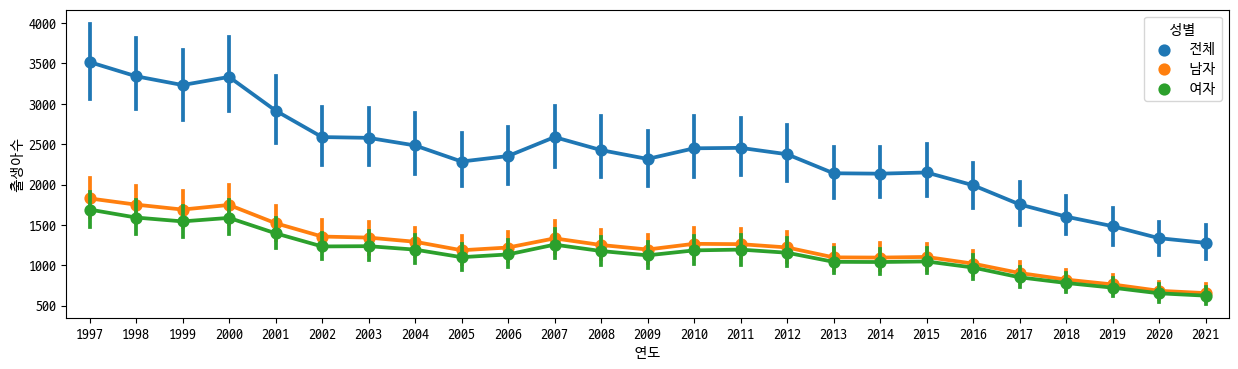

In [48]:
plt.figure(figsize=(15,4))
sns.pointplot(x="연도", y="출생아수", data=df1_local_per, hue='성별') # 편차표시 하기때문에 느림, errorbar=None 로 편차표시 생략가능

>> 전체인구구 지속적 감소 ..남여의 출생아수 간격이 좁아짐

In [49]:
df1_local_pall = df1_local[(df1_local['시군구별']!='전국') & (df1_local['성별']=='전체')]  #  '전국' 제외, 성별이 전체인것만 선택
df1_local_pall = df1_local_pall[['연도','월','출생아수','시군구별']]
df1_local_pall.head(5)

,연도,월,출생아수,시군구별
1,1997,01,13205.0,서울특별시
2,1997,01,4201.0,부산광역시
3,1997,01,3345.0,대구광역시
4,1997,01,3646.0,인천광역시
5,1997,01,2166.0,광주광역시


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: xlabel='연도', ylabel='출생아수'>

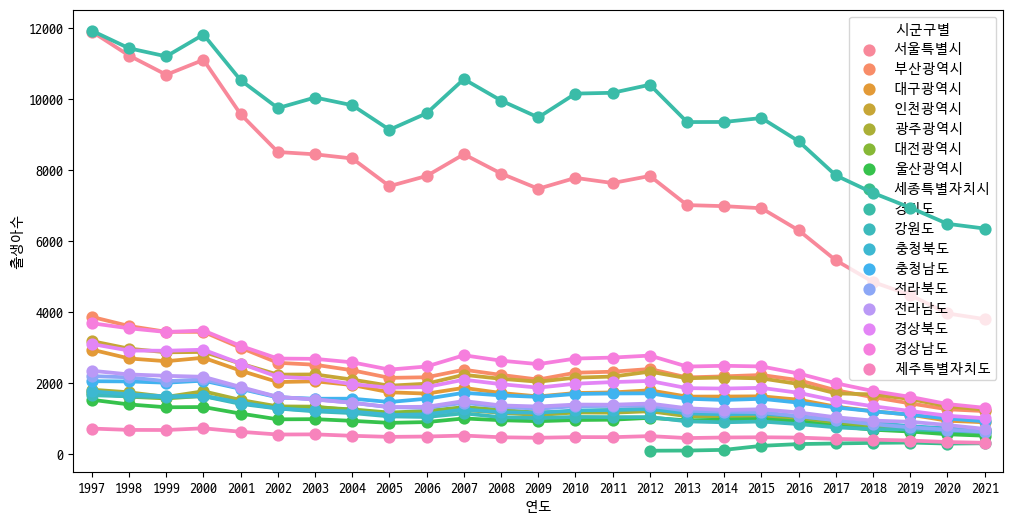

In [58]:
plt.figure(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.75, 0.5), loc='center right', ncol=1)  # 범례 위치 조정
sns.pointplot(x="연도", y="출생아수", data=df1_local_pall, hue='시군구별', errorbar=None)

>> 출생율 감소를 서울특별시와 경기도 에서 주도

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: xlabel='연도', ylabel='출생아수'>

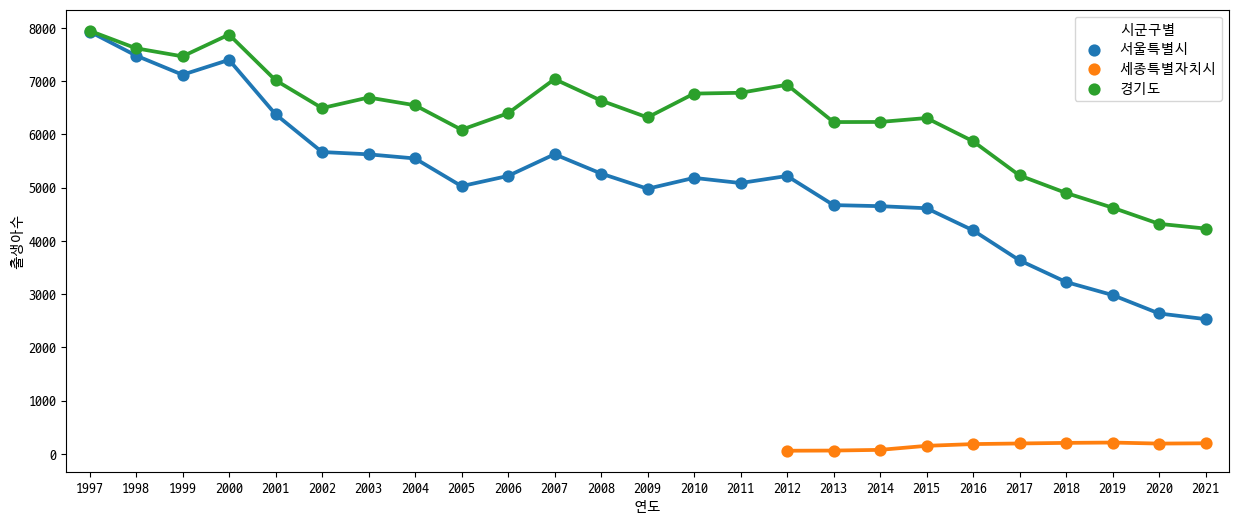

In [59]:
df1_local_2 = df1_local[df1_local['시군구별'].isin(['서울특별시','경기도','세종특별자치시'])]
plt.figure(figsize=(15,6))
plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center right', ncol=1)  # 범례 위치 조정
sns.pointplot(x="연도", y="출생아수", data=df1_local_2, hue='시군구별', errorbar=None)

>> 서울특별시 경기도는 지속적으로 출생율이 감소하나 세종시만 상승하는 특이한 모습 보임

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: xlabel='연도', ylabel='출생아수'>

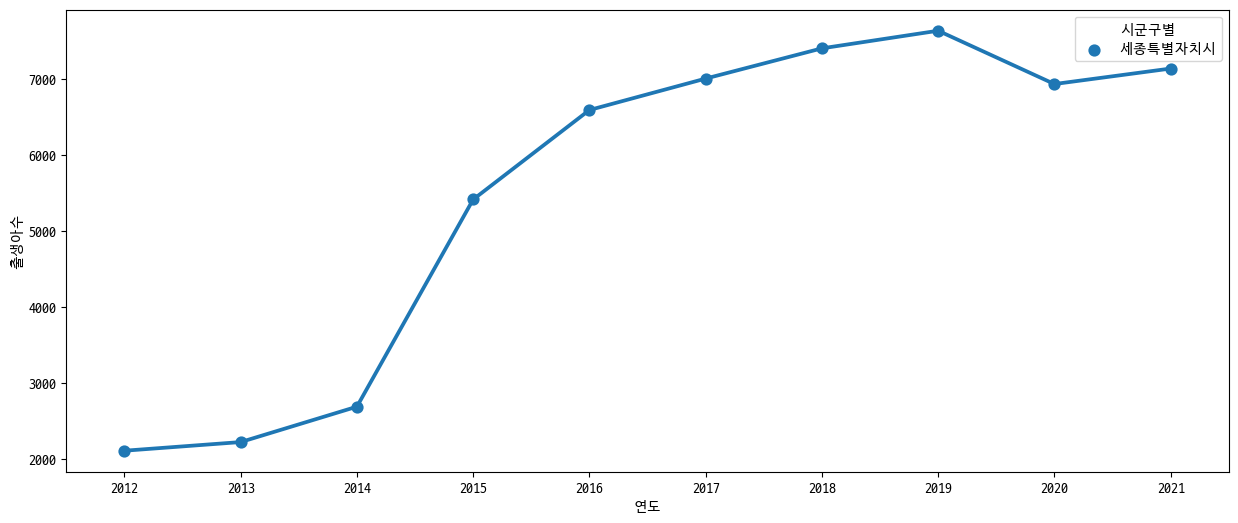

In [62]:
df1_local_sj = df1_local[df1_local['시군구별'] =='세종특별자치시'].dropna(how='any')
plt.figure(figsize=(15,6))
plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center right', ncol=1)  # 범례 위치 조정
sns.pointplot(x="연도", y="출생아수", data=df1_local_sj, hue='시군구별', estimator=np.sum, errorbar=None)

>> 세종시만 크게 보면 나홀로 증가가 눈에 보인다